# HOMEWORK 3
*Solució numèrica equació de Schrödinger*

**1. Trieu un dels exemples que hi ha resolts (oscil.lador harmònic, pou de potencial finit,...). Modifiqueu el codi original canviant el potencial per un altre que hàgiu triat. Pot ser un qualsevol de la vostra elecció.
Podria ser interessant triar un que conegeu ja de cursos anteriors o un cas que sigui interessant però que tingui solució ja estudiada per a poder comprovar els resultats.**

**Abans d’implementar el potencial que hàgiu triat, és aconsellable repassar l’estructura del codi i en particular
identifiqueu on s’avalua el potencial i on es calculen els coeficients Fij de la matriu que defineix el mètode
explicat a classe. Comproveu si cal fer algun canvi en el càlcul de la matriu F segons les unitats que hàgiu
triat.**

Farem servir l'exemple de l'oscil·lador harmònic quàntic, però, modificarem una part del codi original per a fer l'exemple d'un "Quartic Oscillator". Seguirem les mateixes constants de l'exemple de l'oscil·lador quàntic, l'única modificació que farem serà la de canviar el potencial. Podem veure l'exemple que farem en el següent enllaç: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Quantum_Tutorials_(Rioux)/09%3A_Numerical_Solutions_for_Schrodinger's_Equation/9.11%3A_Numerical_Solutions_for_the_Quartic_Oscillator

In [1]:
#Primer de tot, importem les llibreries
import numpy as np
import matplotlib.pyplot as plt

Ara definirem el potencial de l'oscil·lador quàntic, canviarem l'original de l'oscil·lador quàntic normal pel del "quartic oscillator" que defineix el potencial com una potència elevada a 4.

In [2]:
#Definim el potencial en funció de la posició
def getV(x):
    potvalue = x**4
    return potvalue

Amb el potencial canviat, definim la funció que calcula la matriu que té en compte l'equació de Schrödinger tal com en l'exemple original.

In [3]:
#Equació de Schrödinger discretitzada en n punts (del 0 fins a n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

Una vegada tenim el potencial que volem fer servir i la matriu F, podem determinar els paràmetres de la caixa que farem servir. Per tal de variar una mica els càlculs només canviarem la longitud de la caixa fins a 10. També en aquest apartat podem triar l'interval de discretització, veurem com afecta en el resultat en el segon exercici.

In [12]:
# Interval de la funció d'ona [-L/2,L/2]
L = 10
xlower = -L/2.0
xupper = L/2.0

#Interval de discretització
h = 0.02

#Creem coordenades on es calcularà la solució
x = np.arange(xlower,xupper+h,h)
#grid size (el nombre de punts discrets que farem servir en l'interval [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 501 grid points.


Ara ja podem calcular F per trobar els valors i vectors propis de la matriu. Aquestes solucions de la diagonalització ens donaran els resultats que estem buscant, però de manera desordenada, per això, també ordenarem els valors en funció de n.

In [15]:
#Càlcul a partir de l'equació de Schrödinger i diagonalització
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Ordenació de la diagonalització
#w serà els valors propis ordenats i vs seran els vectors propis ordenats
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Nivell d'energia
E = - w/(2.0*h**2)

Ara que ja tenim els resultats ordenats podem veure els primers nivells d'energia, en aquest cas només veurem els tres primers.

In [17]:
#Nivells d'energia
E = - w/(2.0*h**2)
for k in range(0,3):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=0.6679
n= 1 , E(numeric)=2.3934
n= 2 , E(numeric)=4.6959


Finalment, podem graficar les funcions d'ona dels diferents nivells d'energia.

Plotting


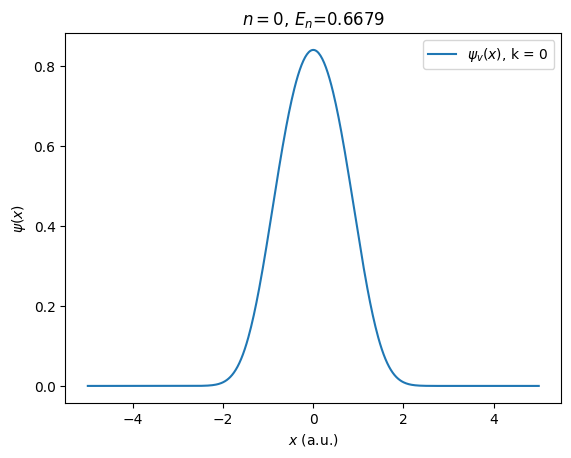

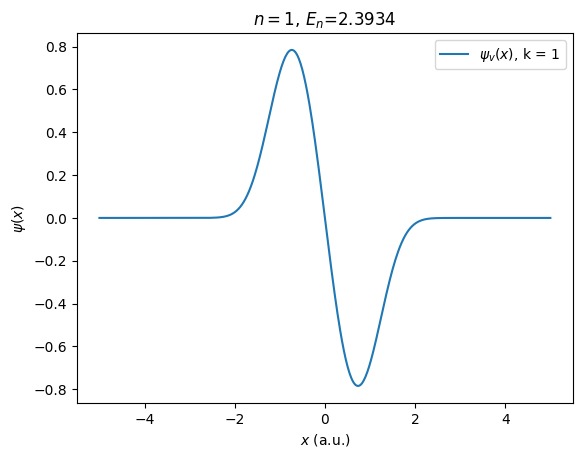

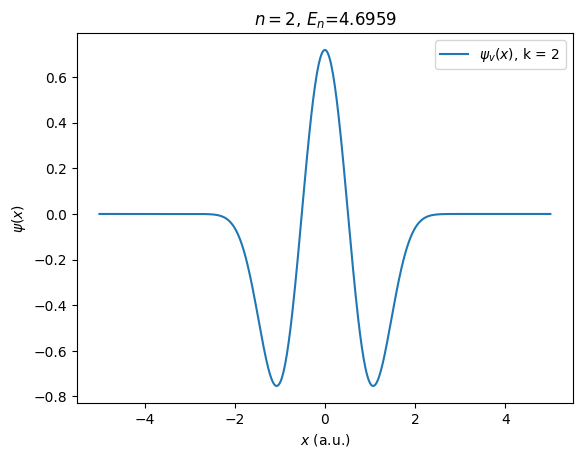

In [19]:
#Posem la funció d'ona inicial (una llista buida amb npunts d'elements)
psi = [None]*npoints

#Càlcul de les funcions d'ona normalitzades
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Fem la gràfica de les funcions d'ona
print("Plotting")

#Triem només les primeres tres solucions
#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,3):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()

Si ens fixem en el resultat donant en l'exemple de solucions numèriques per un "Quartic oscillator" a l'enllaç que hem compartit anteriorment veiem que les solucions són molt semblants. Hi ha una petita diferència de decimals en els valors de l'energia a causa de les aproximacions i valors que hem triat els quals es poden millorar. Pel que fa a les funcions d'ona són les que corresponen a un oscil·lador d'aquest tipus. Posem captures de pantalla per veure les solucions de l'exemple en què ens hem basat.

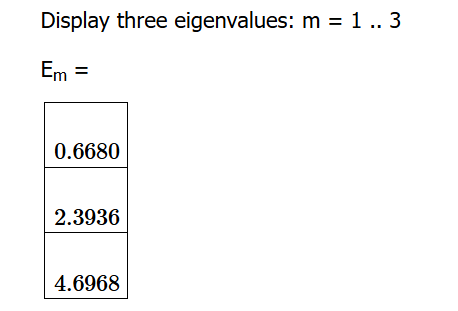

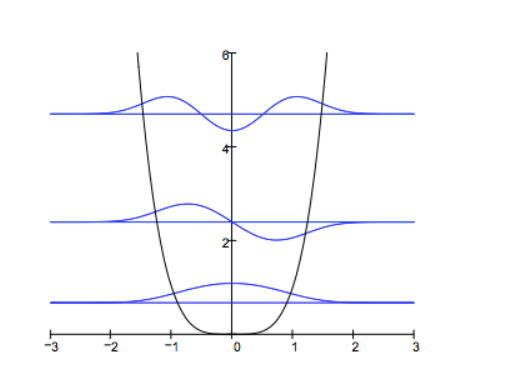

 **2. Executeu el codi canviant el valor de la discretització (augmentat o disminuint el nombre de punts) i comproveu si té algun efecte en els vostres resultats.**

Per canviar el valor de la discretització hem de modificar la línia de codi on definim el valor de h. A veure què passa quan disminuïm el valor a la meitat, i com això afecta els resultats.

In [23]:
# Interval de la funció d'ona [-L/2,L/2]
L = 10
xlower = -L/2.0
xupper = L/2.0

#Interval de discretització
h = 0.01

#Creem coordenades on es calcularà la solució
x = np.arange(xlower,xupper+h,h)
#grid size (el nombre de punts discrets que farem servir en l'interval [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 1001 grid points.


En disminuir a la meitat l'interval de discretització hem duplicat la quantitat de punts que calculem dintre de la caixa. El càlcul trigarà més a fer-se, però serà més precís. Fem servir el mateix que abans.

In [24]:
#Càlcul a partir de l'equació de Schrödinger i diagonalització
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Ordenació de la diagonalització
#w serà els valors propis ordenats i vs seran els vectors propis ordenats
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Nivell d'energia
E = - w/(2.0*h**2)

I una vegada hem fet els càlculs analitzem les primeres tres energies.

In [22]:
#Nivells d'energia
E = - w/(2.0*h**2)
for k in range(0,3):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=0.6680
n= 1 , E(numeric)=2.3936
n= 2 , E(numeric)=4.6966


Com podem veure les dues primeres energies són exactament iguals a les que veiem en les solucions numèriques de l'exemple que hem fet servir. I en el tercer valor d'energia hem millorat molt respecte al resultat amb l'interval de discretització anterior. Només reduint a la meitat la discretització es veu un canvi molt significatiu en el resultat. No analitzarem les gràfiques de les funcions d'ona perquè són molt semblants i no hi ha cap diferència significativa. Ara duplicarem el valor de l'interval de discretització per veure com varien els resultats.

In [26]:
# Interval de la funció d'ona [-L/2,L/2]
L = 10
xlower = -L/2.0
xupper = L/2.0

#Interval de discretització
h = 0.04

#Creem coordenades on es calcularà la solució
x = np.arange(xlower,xupper+h,h)
#grid size (el nombre de punts discrets que farem servir en l'interval [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 251 grid points.


Ara només calcularem la meitat dels punts i, per tant, obtindrem un resultat menys precís.

In [27]:
#Càlcul a partir de l'equació de Schrödinger i diagonalització
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Ordenació de la diagonalització
#w serà els valors propis ordenats i vs seràn els vectors propis ordenats
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Nivell d'energia
E = - w/(2.0*h**2)

In [28]:
#Nivells d'energia
E = - w/(2.0*h**2)
for k in range(0,3):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=0.6678
n= 1 , E(numeric)=2.3926
n= 2 , E(numeric)=4.6932


Com podem veure, ara els resultats s'allunyen més del valor exacte.